In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from data.datamapping import k,s, z, flags, wes_show, del_mu, data_dir, process_step, data_out,img_out_path, plots
from data.datamapping import file_name, data_cols, dis_list, dis_flag, R_v, R, A, mag, colors, R_dic, fouque_extinction_ratios
from lvtlaw.main_modules import intro
#intro()
print(file_name)
data = pd.read_csv(f'data/input/{file_name}.csv')
#radial velocity and photometry for IRSB ralial voelocity, V and K band
#data = data[['name', 'logP', dis_list[0], 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag']]
#data = data.sort_values(by = ['logP'],ascending=True).dropna().reset_index(drop=True)
data.head(2).style

59_fouque_madore


,col1,name,logP,HST,IRSB,gplx,EBV,EBV_2,B_mag,V_mag,I_mag,J_mag,H_mag,K_mag,M_B,M_V,M_R,M_I,M_J,M_H,M_K,modu,excessu,M_Bu,M_Vu,M_Ru,M_Iu,M_Ju,M_Hu,M_Ku,Mb,Mv,Mi,Mj,Mh,Mk,DR3Name,RUWE,Gmag,BPmag,RA_ICRS,DE_ICRS,RPmag,QLT,Star,logP_2,BMAG,VMAG,RcMAG,IcMAG,Wvi,Wbi,JMAG,HMAG,KsMAG
0,0,RT Aur,0.571489,8.099000,7.999000,8.635429,0.059000,0.059000,6.036000,5.443000,4.767000,4.302000,3.989000,3.937000,-2.310000,-2.840000,-3.200000,-3.400000,-3.940000,-4.150000,-4.240000,8.169000,0.202000,-1.640000,-2.310000,-2.790000,-3.110000,-3.740000,-3.990000,-4.120000,-2.213000,-2.745000,-3.348000,-3.753000,-4.044000,-4.085000,Gaia DR3 3435571660360952704,6.435000,5.336251,5.636953,97.142032,30.492976,4.809206,3,RT Aur,0.571489,-2.310000,-2.840000,nan,-3.400000,-4.280000,-4.350000,-3.940000,-4.150000,-4.240000
1,1,QZ Nor,0.578244,10.512000,10.706000,11.425521,0.253000,0.263000,9.756000,8.869000,7.865000,7.136000,6.733000,6.619000,-1.830000,-2.470000,-2.850000,-3.150000,-3.670000,-3.910000,-4.010000,10.258000,0.184000,-2.370000,-2.940000,-3.270000,-3.510000,-3.990000,-4.210000,-4.290000,-2.063000,-2.686000,-3.357000,-3.818000,-4.127000,-4.188000,Gaia DR3 5932565900081831040,1.032000,8.623737,9.117518,242.835262,-54.354135,7.946956,3,QZ Nor,0.578244,-1.830000,-2.470000,-2.850000,-3.150000,-4.210000,-4.290000,-3.670000,-3.910000,-4.010000


# Distance Deviation

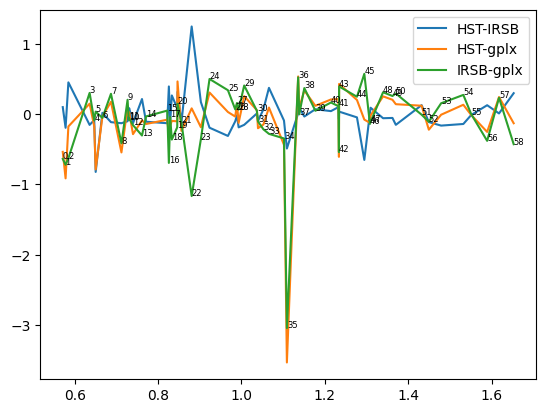

In [22]:
X=data['logP']
Y=data.IRSB - data.gplx
plt.plot(X, data.HST - data.IRSB, label = 'HST-IRSB')
plt.plot(X, data.HST - data.gplx, label = 'HST-gplx')
plt.plot(X, Y, label = 'IRSB-gplx')

for k in range(0,len(data)):
    plt.annotate('%i'%(k), xy =(X.iloc[k], Y.iloc[k]), fontsize = 6)
plt.legend()

# Magnitude Deviation

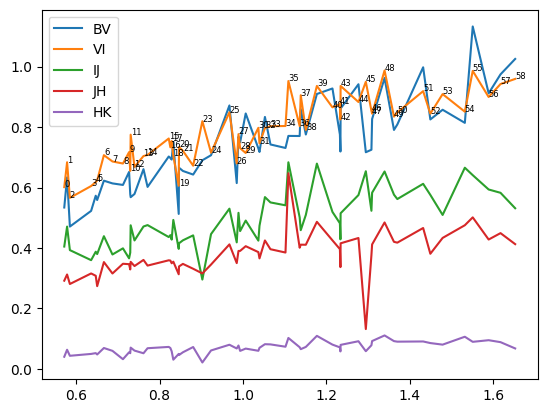

In [48]:
for i, m in enumerate(mag):
    if i == 5:
        break
    m1 = data[f'{m}_mag']-data['EBV']*R[m]
    m2 = data[f'{mag[i+1]}_mag']-data['EBV']*R[mag[i+1]]
#    m1 = data[f'M_{m}'] + data.HST + data.EBV * R[m]
#    m2 = data[f'{mag[i]}_mag']
    plt.plot(X, m1-m2, label=m+mag[i+1])
    if i == 1:
        for k in range(0,len(data)):
            plt.annotate('%i'%(k), xy =(X.iloc[k], m1[k]-m2[k]), fontsize = 6)
plt.legend()

# Wesenheit deviation

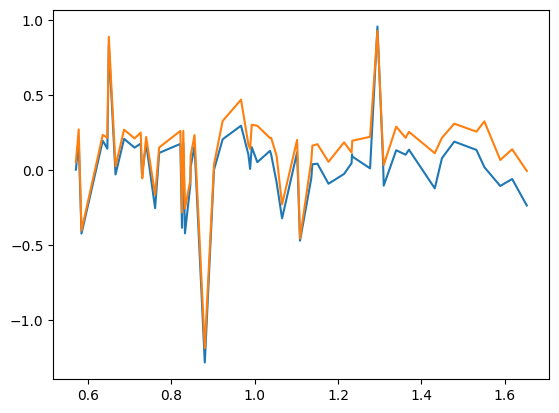

In [42]:
from data.datamapping import R123

wesen = pd.DataFrame()
for a,c1 in enumerate(mag):
    for b,c2 in enumerate(mag[a+1:]):
        for c,m in enumerate(mag):
            Rm12 = R123(m,c1,c2, R)
            wes_str = m+c1+c2
            wesen[wes_str] = data[f'{m}_mag'] - Rm12*(data[f'{c1}_mag'] - data[f'{c2}_mag']) - data.IRSB

plt.plot(data.logP, data.Wvi - wesen['VVI'])
plt.plot(data.logP, data.Wvi - wesen['BBI'])


VI


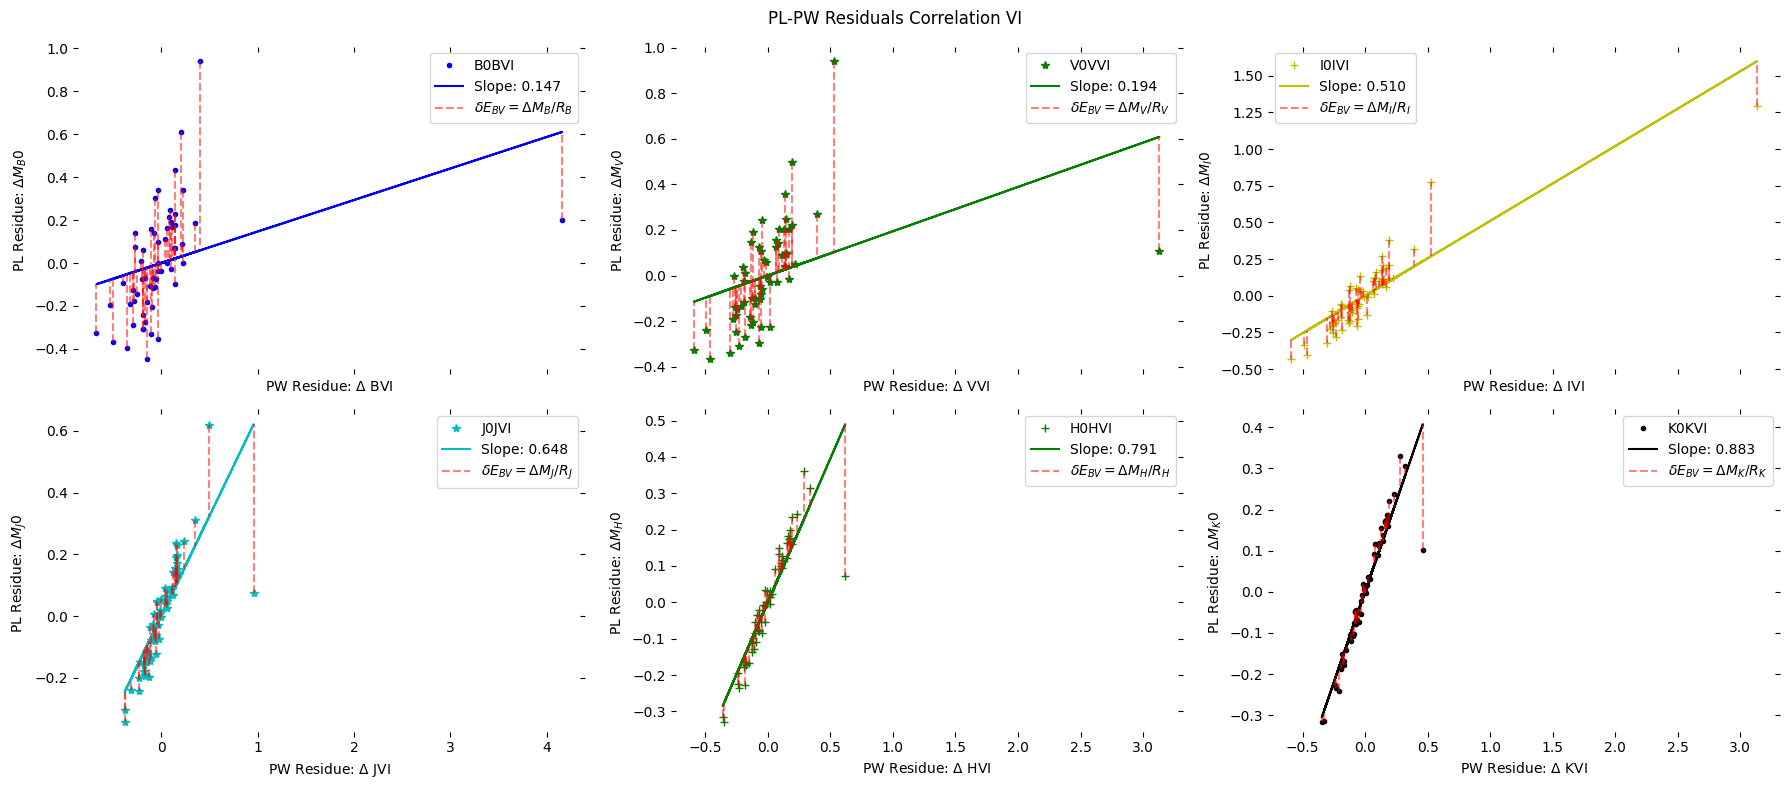

IK


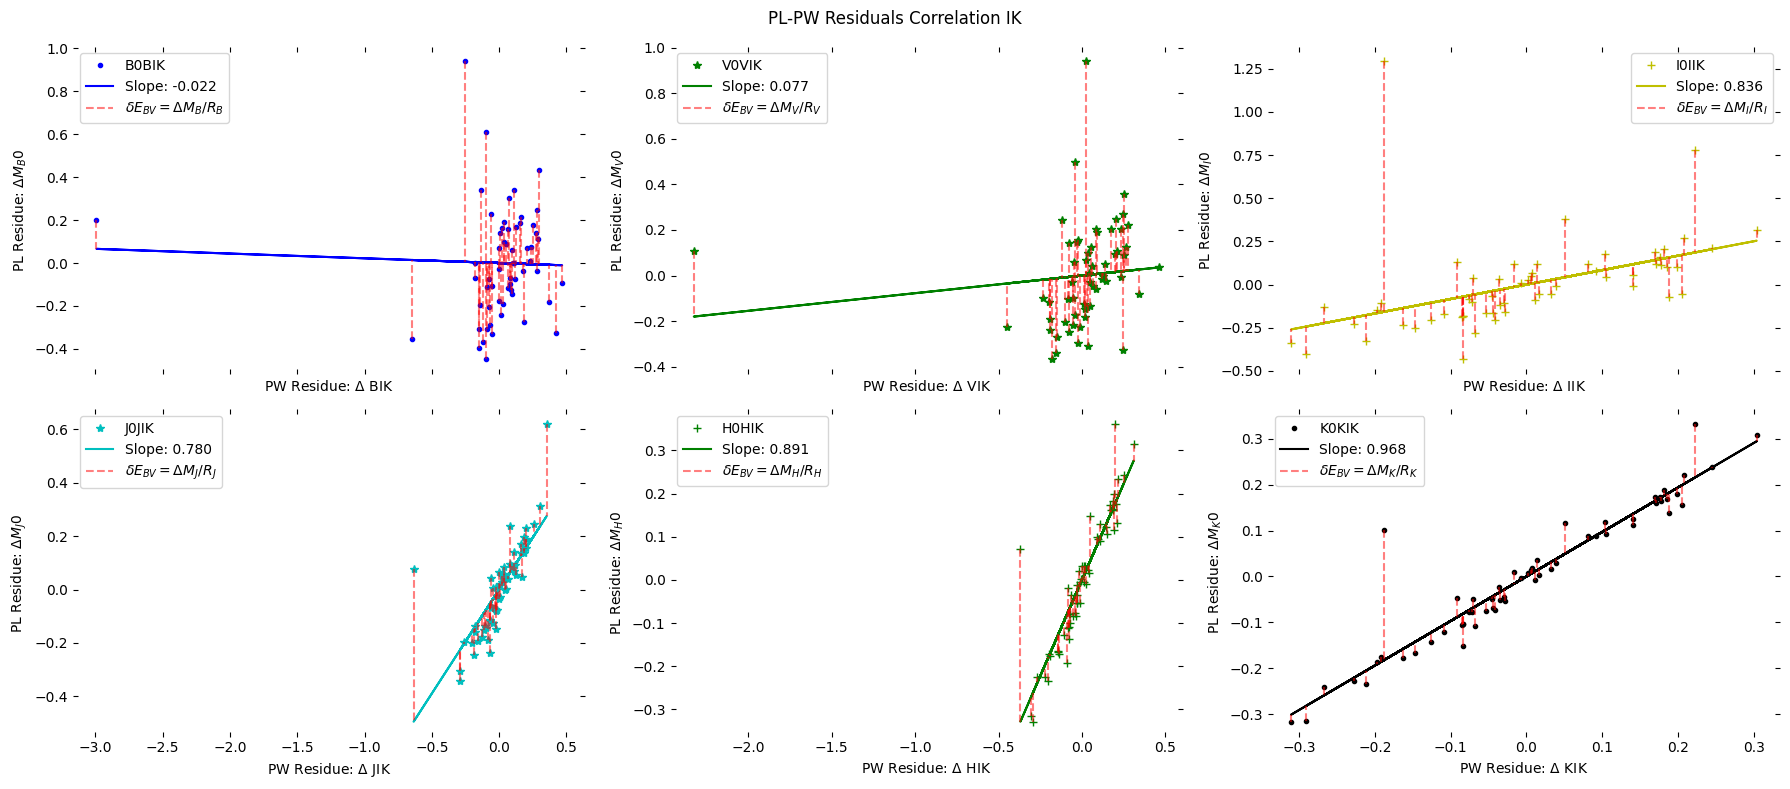

JH


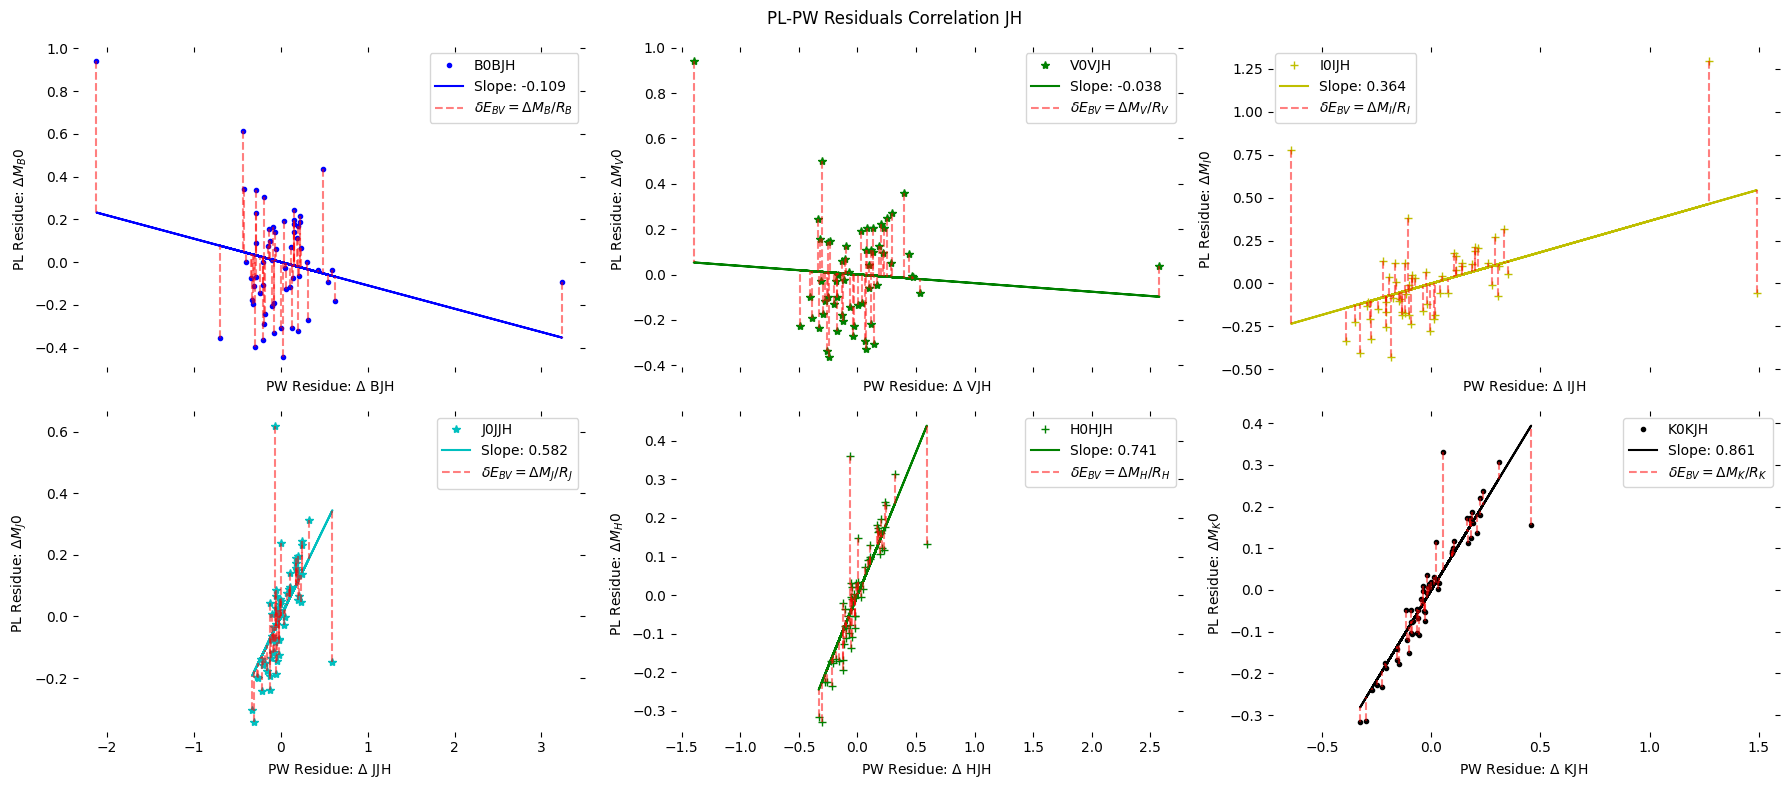

JK


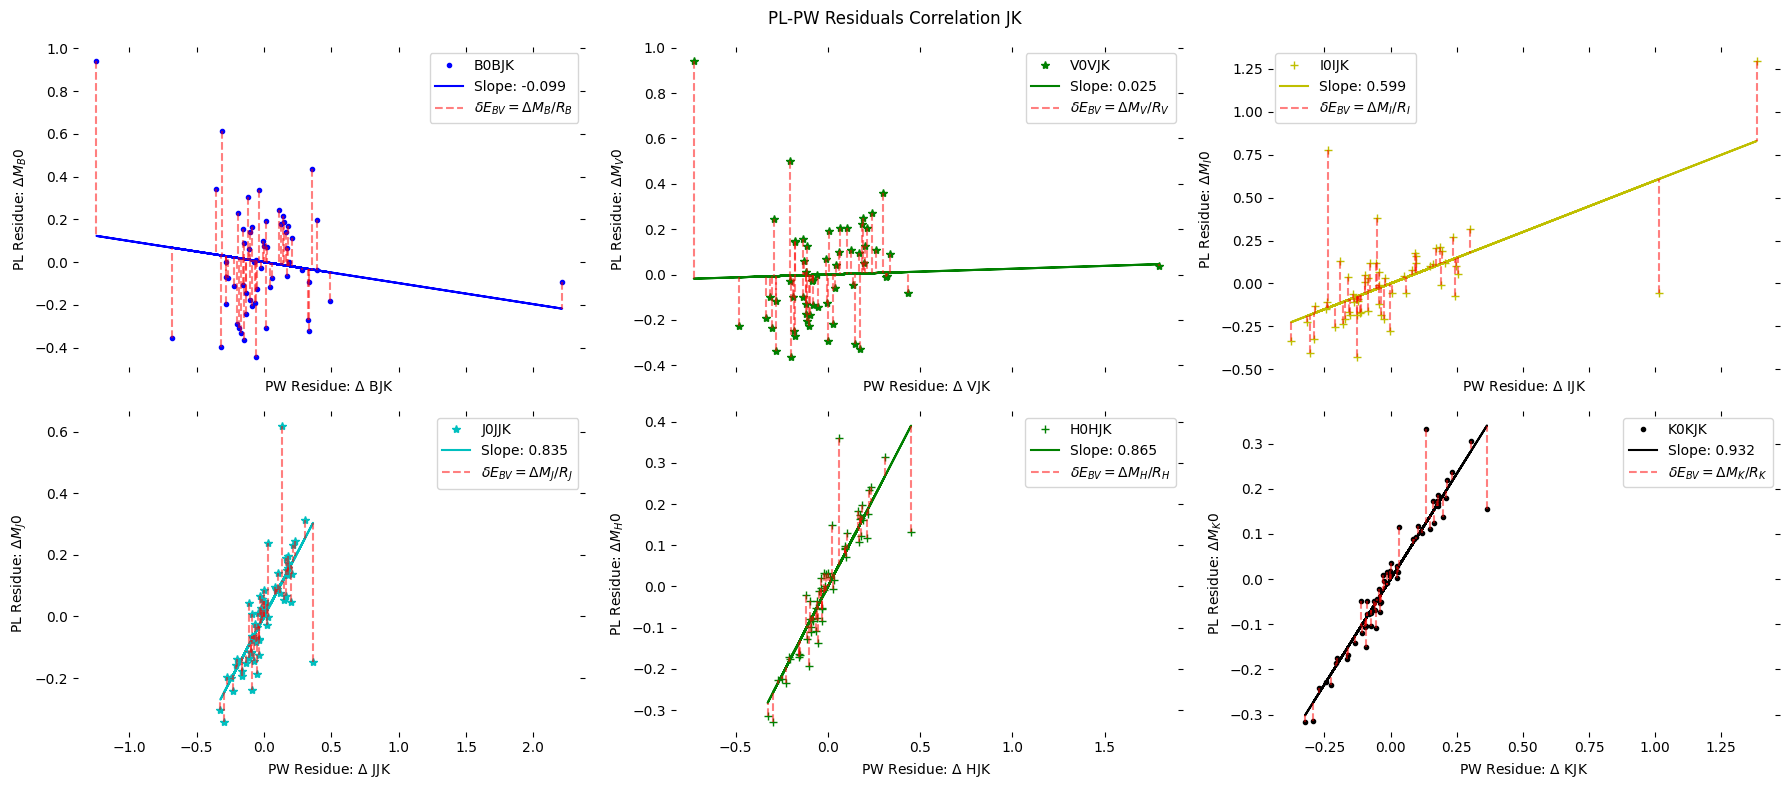

[None, None, None, None]

In [46]:
from lvtlaw.d_del_del import *
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import *
n=59
dis_flag = ['_p', '_j', '_h']
dis_list = ['IRSB', 'gplx', 'HST']
file_name = f'{n}_IRSB_plx'
ex = ['_F', '_S']
dd=['VI', 'IK', 'JH', 'JK']
data_out_pf=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}{ex[0]}/'
data_out_jf=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}{ex[0]}/'
data_out_hf=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}{ex[0]}/'
data_out_ps=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}{ex[1]}/'
data_out_js=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}{ex[1]}/'
data_out_hs=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}{ex[1]}/'
#dmc, dpre, dres, merged_data = residual_correlation_(data_out_p, n) 
#[plotdeldel6(merged_data, dmc, col, dis_flag[0], 'S', '0', 0) for col in dd]

dmc, dpre, dres, merged_data = residual_correlation_(data_out_hf, n) 
[plotdeldel6(merged_data, dmc, col, dis_flag[2], 'S', '0', 0) for col in dd]